<a href="https://colab.research.google.com/github/tazookb/My_Public_Profile/blob/main/Donald_Trump_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello, Thanks for taking the time to look at my fun project for a twitter sentiment analysis of Donald Trump's tweets! This is a simple project and I will be demonstrating concepts in python to show some skills in Data Cleaning and Word Cloud Visualization.

Just a quick caveat, I am a Canadian with apolitical views and this project is not meant to support or hurt Trump. It is just about his tweets and doing some sentiment analysis and viewing the times of day.


In [6]:
# Importing relevant libraries required for this analysis (only pandas,seaborn and matplotlib have aliases)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import nltk
import requests
import io

In [7]:
#Lets just import and check the data
#Google Sheets Links
google_sheets_link = 'https://docs.google.com/spreadsheets/d/1DPMiSfLaT1AdW6vqSeLE7ZY-7JArrCtkhZlA0C01TXI/export?format=csv'

# Making a request to the Google Sheets link using response library
response = requests.get(google_sheets_link)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.text))
    print(data)
else:
    print("Failed to fetch data. Status code:", response.status_code)

                 id                                               link  \
0      1.698309e+09  https://twitter.com/realDonaldTrump/status/169...   
1      1.701461e+09  https://twitter.com/realDonaldTrump/status/170...   
2      1.737480e+09  https://twitter.com/realDonaldTrump/status/173...   
3      1.741161e+09  https://twitter.com/realDonaldTrump/status/174...   
4      1.773561e+09  https://twitter.com/realDonaldTrump/status/177...   
...             ...                                                ...   
41117  1.218963e+18  https://twitter.com/realDonaldTrump/status/121...   
41118  1.219005e+18  https://twitter.com/realDonaldTrump/status/121...   
41119  1.219054e+18  https://twitter.com/realDonaldTrump/status/121...   
41120  1.219066e+18  https://twitter.com/realDonaldTrump/status/121...   
41121  1.219077e+18  https://twitter.com/realDonaldTrump/status/121...   

                                                 content                 date  \
0      Be sure to tune in and 

In [8]:
#Get Column Names
print (data.columns)

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags', 'geo'],
      dtype='object')


In [9]:
#Selecting only the tweets columns and checking for null values
data1 = data[['id','content','date']]
data1.isnull().sum()

id         0
content    0
date       0
dtype: int64

Tweet Text Cleaning:
The next code will eliminate links, punctuation, symbols (emojis) and other language errors from the tweets.

In [10]:
# Download stopwords and initialize the Snowball Stemmer
nltk.download('stopwords')
stemmer = SnowballStemmer('english')
stopword_set = set(stopwords.words('english'))

# Define the clean function
def clean(text):
    text = str(text).lower()
    text = re.sub('\n', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = [word for word in text.split(' ') if word not in stopword_set]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

# Apply the clean function to the tweets
data1['content'] = data1['content'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-10-cc24b987dc03>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['content'] = data1['content'].apply(clean)


Data Visualization (quick):
In the next code, matplot lib will be used to create a wordlcoud of the most frequent words used when it comes to the former president. For the sake of time and  hardware resources, I prioritized efficiency in my code over detail.

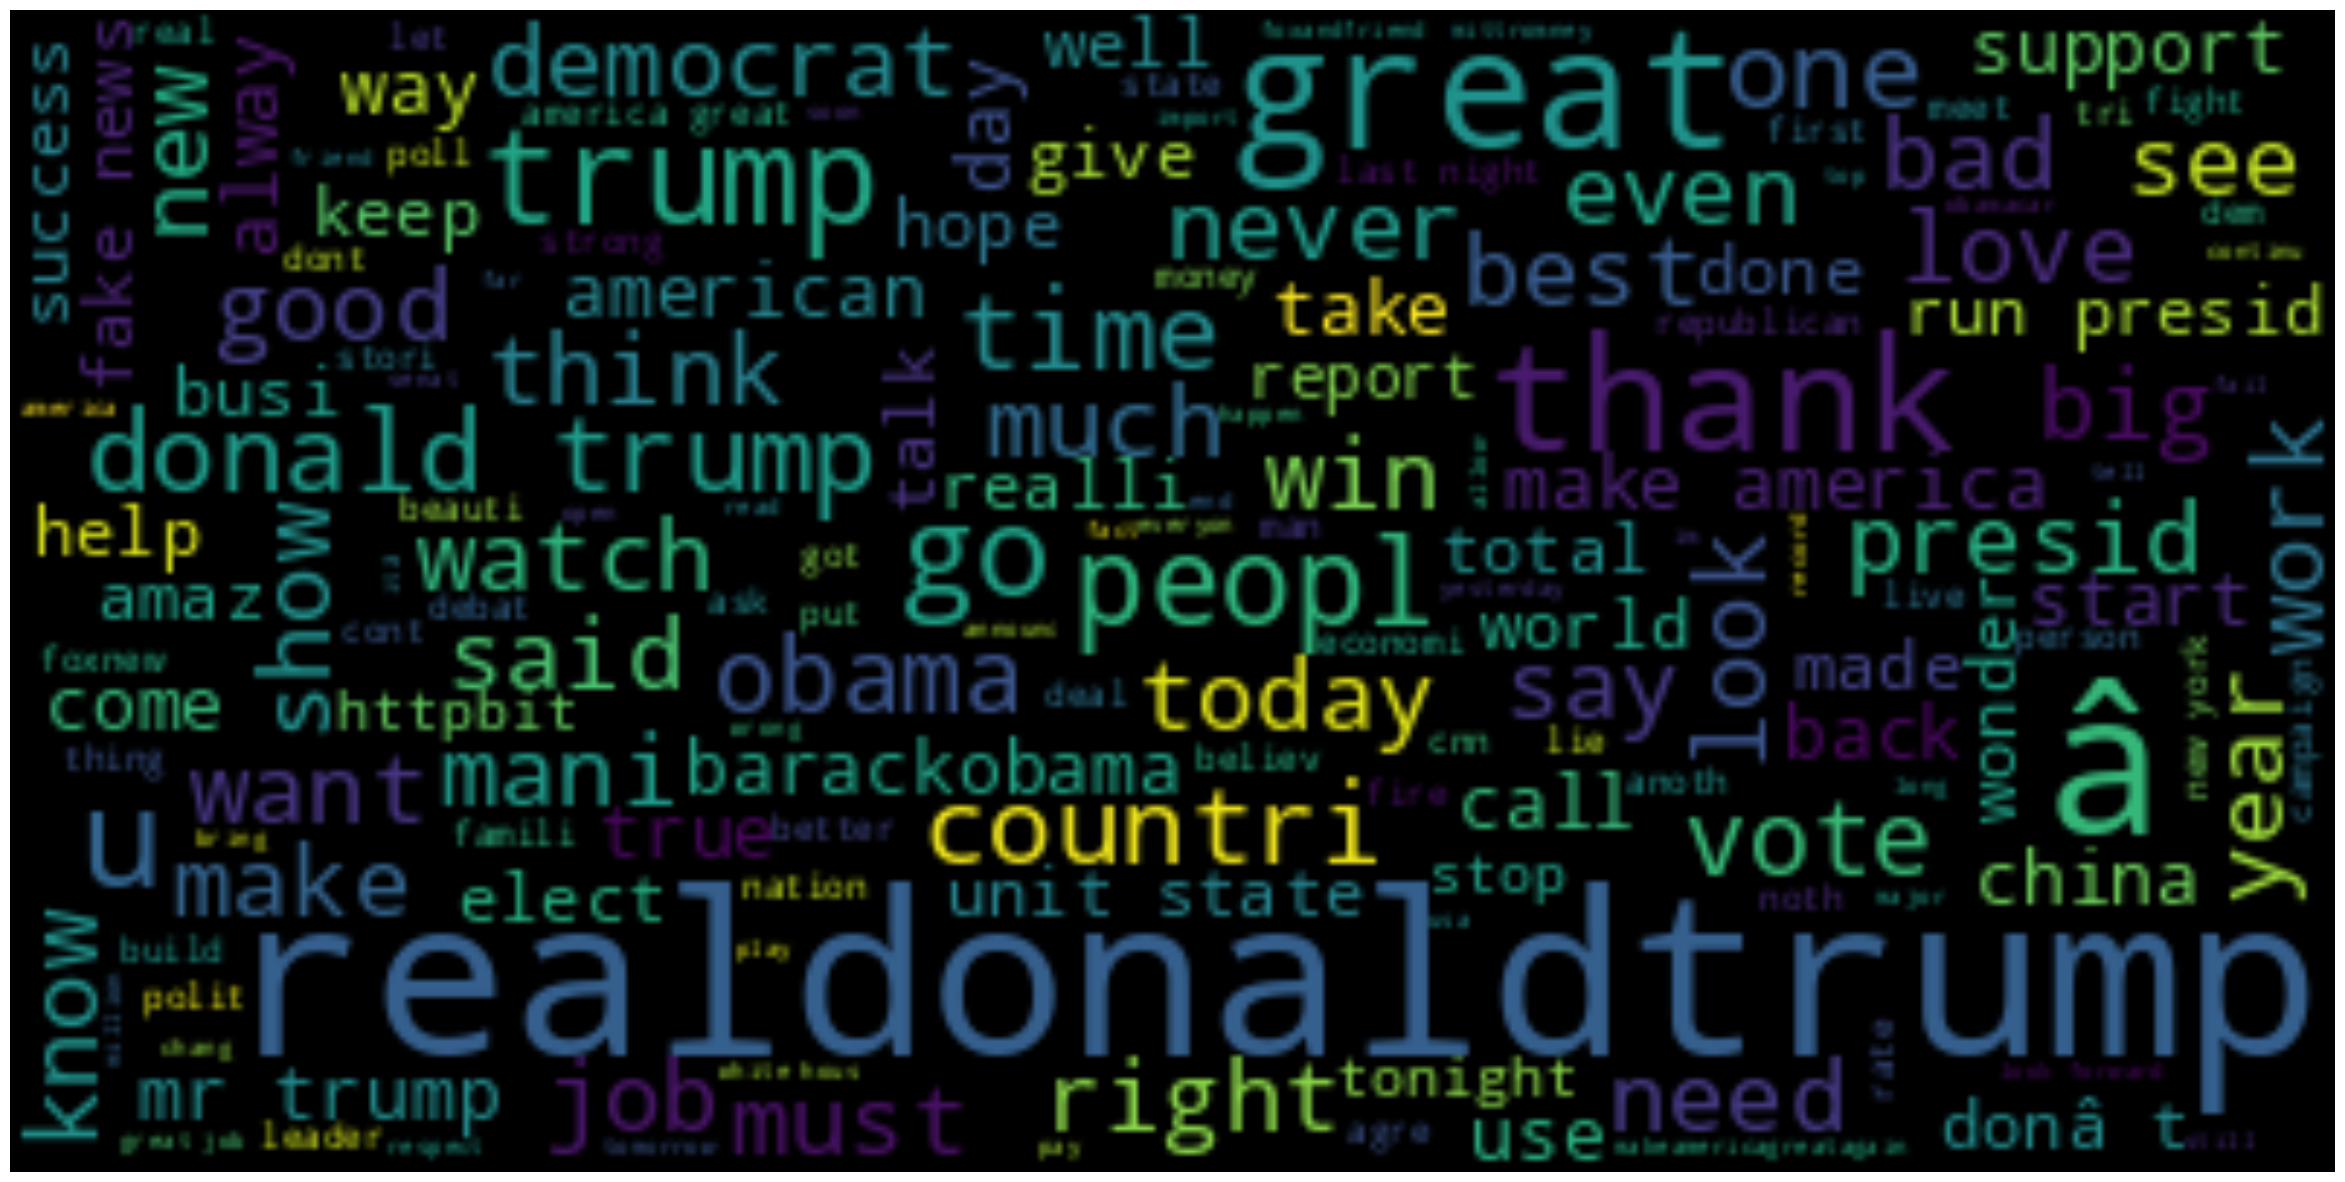

In [11]:
# Concatenating all tweets into a single text
text  = ''.join (t for t in data1['content'])

# Creating a Set of Stopwords
stopwords = set (STOPWORDS)

#Creating and displaying the Word Cloud
wordcloud = WordCloud(stopwords = stopwords, background_color= 'black').generate(text)
plt.figure (figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear') # bicubic provides slighly better clarity but is slower (50%)
plt.axis('off')
plt.show()

In the next code, I will be using the vader lexicon to assign positive, neutral and negative values to each tweet.

In [12]:
# Downloading the Vader Lexicon and creating a sentiment intensity analyzer instance
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

# Calculating and adding the sentiment scores (Positive, Neutral, Negative) to the DataFrame
data1['Positive']= [sentiments.polarity_scores(t)['pos'] for t in data1['content']]
data1['Neutral']= [sentiments.polarity_scores(t)['neu'] for t in data1['content']]
data1['Negative']= [sentiments.polarity_scores(t)['neg'] for t in data1['content']]

#Creating a new DataFrame with the sentiment scores of each tweet, the tweet itself and the date.
data2 = data1[['content','Positive','Neutral','Negative','date']]
print(data2.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-12-fd7e5825b229>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Positive']= [sentiments.polarity_scores(t)['pos'] for t in data1['content']]
<ipython-input-12-fd7e5825b229>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Neutral']= [sentiments.polarity_scores(t)['neu'] for t in data1['content']]


                                             content  Positive  Neutral  \
0  sure tune watch donald trump late night david ...     0.255    0.745   
1  donald trump appear view tomorrow morn discuss...     0.348    0.652   
2  donald trump read top ten financi tip late sho...     0.130    0.870   
3  new blog post celebr apprentic final lesson le...     0.000    1.000   
4  persona never wallflow  iâd rather build wal...     0.000    1.000   

   Negative                 date  
0       0.0  2009-05-04 20:54:25  
1       0.0  2009-05-05 03:00:10  
2       0.0  2009-05-08 15:38:08  
3       0.0  2009-05-08 22:40:15  
4       0.0  2009-05-12 16:07:28  


<ipython-input-12-fd7e5825b229>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Negative']= [sentiments.polarity_scores(t)['neg'] for t in data1['content']]


Now I will be creating a Wordcloud with the most frequently used positive word sentiments.

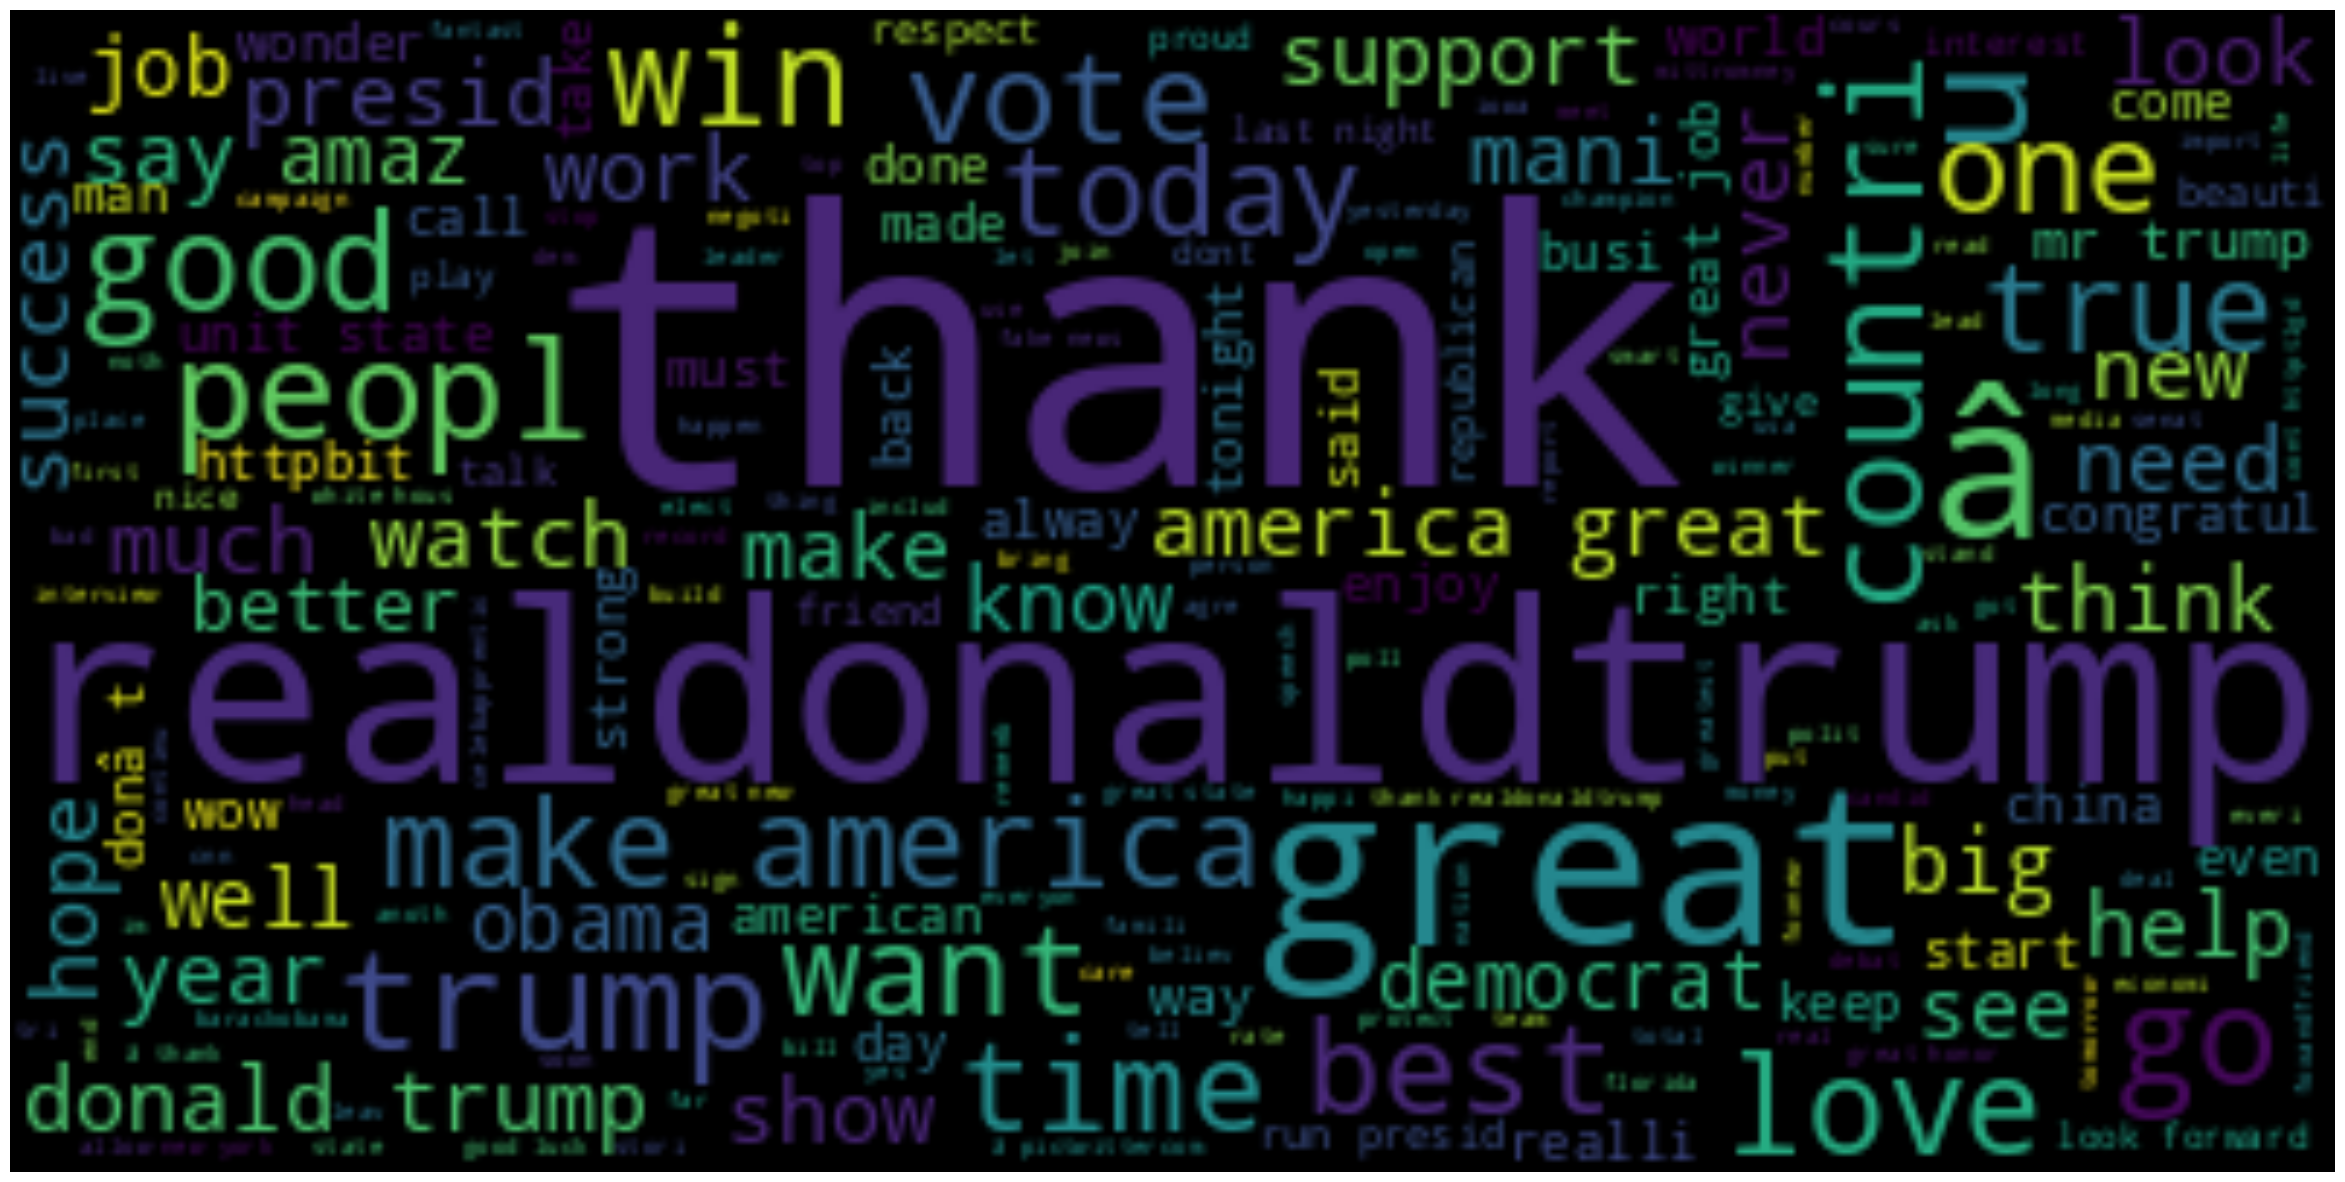

In [13]:
#Creating the positive sentiment text
positive =' '.join([t for t in data2['content'][data2['Positive'] > data2["Negative"]]])

#Creating a set of Stopwords for the WordCloud
stopwords = set(STOPWORDS)

#Creating and Plotting the WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure( figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will be creating a Wordcloud with the most frequently used negative word sentiments.

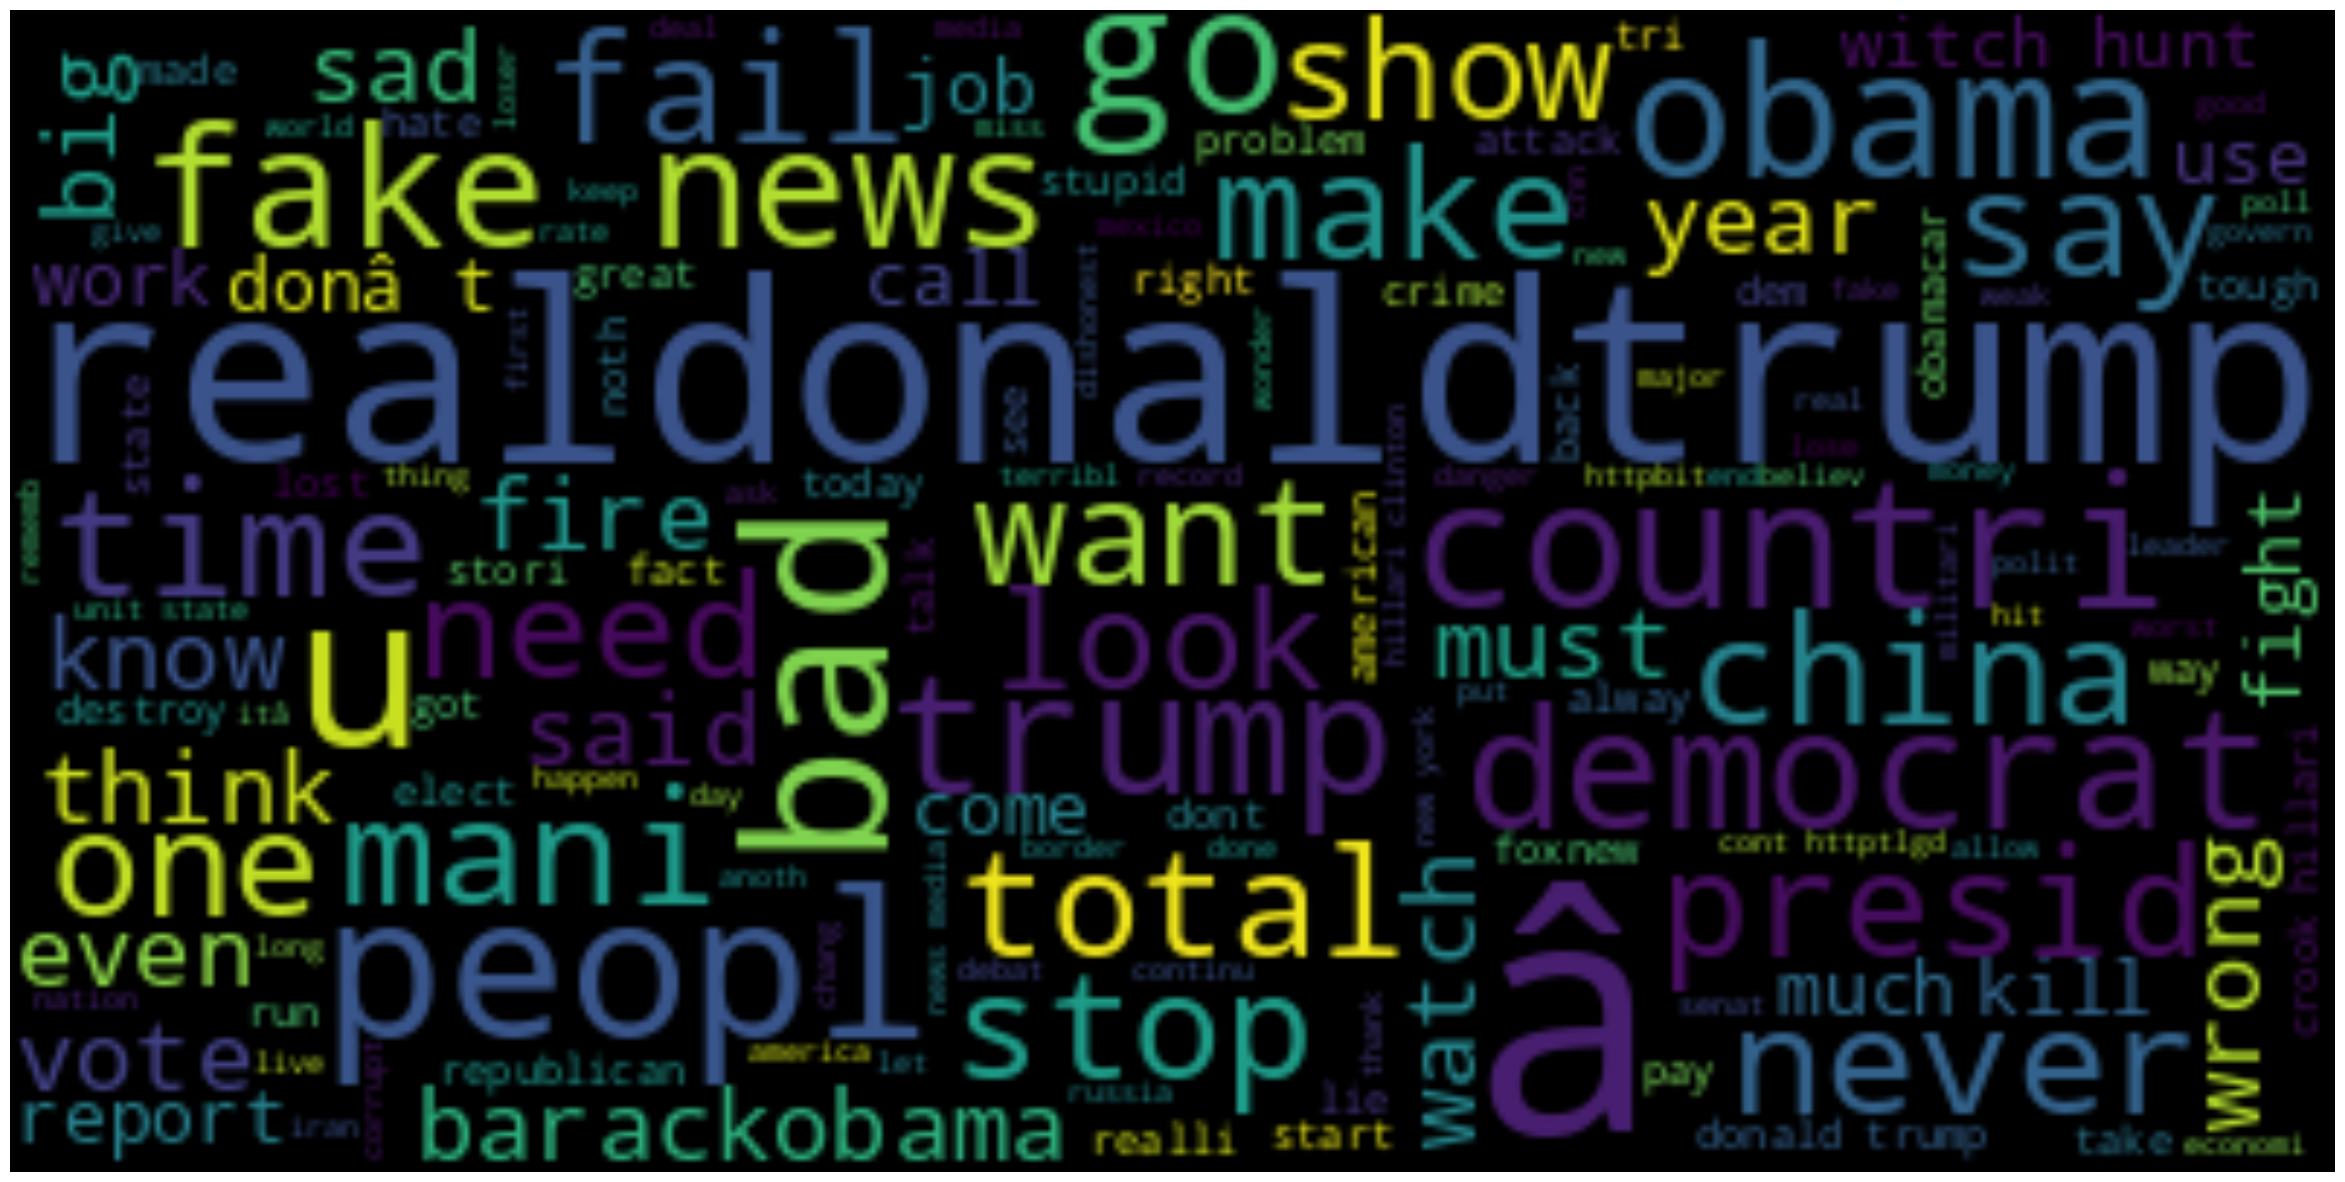

In [14]:
#Creating the negative sentiment text
negative =' '.join([t for t in data2['content'][data2['Negative'] > data2['Positive']]])

#Creating a set of Stopwords for the WordCloud
stopwords = set(STOPWORDS)

#Creating and Plotting the WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure( figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Next, I want to compare the number of positive, negative and netural tweets to see if Trump was skewed in his tweets towards a particular direction.

In [18]:
# To compare the total number of positive, negative, and neutral tweets
total_positive_tweets = data1['Positive'].sum()
total_negative_tweets = data1['Negative'].sum()
total_neutral_tweets = data1['Neutral'].sum()

print(f'Total Positive Tweets: {total_positive_tweets}')
print(f'Total Negative Tweets: {total_negative_tweets}')
print(f'Total Neutral Tweets: {total_neutral_tweets}')

Total Positive Tweets: 8828.749
Total Negative Tweets: 3260.301
Total Neutral Tweets: 29021.015999999992


:
Interesting that Trump tweeted more positive tweets than negative. Next, I want to Visualize the time of day compared to the sentiment of the tweet to see if there is pattern between time of day and Trump's sentiments.



<ipython-input-17-ea74aad3c291>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['date'] = pd.to_datetime(data['date'])


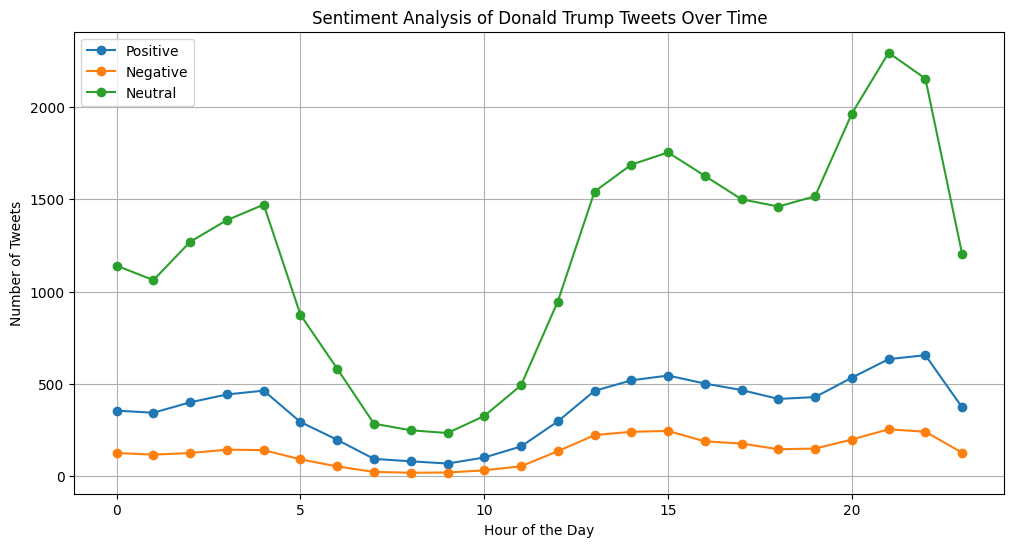

In [17]:
# Data Cleaning: Converting the date into a pd date time stamp
data2['date'] = pd.to_datetime(data['date'])

# Grouping the tweets by the time of day (hour) and calculating the sum of positive, negative, and neutral tweets
hourly_sentiment = data2.groupby(data2['date'].dt.hour)[['Positive', 'Negative', 'Neutral']].sum()

# Calculating the total number of tweets for each hour
hourly_total_tweets = hourly_sentiment.sum(axis=1)


# Plot the total number of positive, negative, and neutral tweets over the day
plt.figure(figsize=(12, 6))
plt.plot(hourly_sentiment.index, hourly_sentiment['Positive'], label='Positive', marker='o')
plt.plot(hourly_sentiment.index, hourly_sentiment['Negative'], label='Negative', marker='o')
plt.plot(hourly_sentiment.index, hourly_sentiment['Neutral'], label='Neutral', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.title ('Sentiment Analysis of Donald Trump Tweets Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Kudos to Trump to remaining consistent! Thanks for checking out my quick fun project!